### 데이터 불러오기

In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\LG\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [18]:
pip install regex

     -------------------------------------- 268.1/268.1 KB 5.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\LG\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [24]:
pip install nltk

     ---------------------------------------- 1.5/1.5 MB 19.2 MB/s eta 0:00:00
     ---------------------------------------- 77.1/77.1 KB ? eta 0:00:00
  Using cached click-8.1.3-py3-none-any.whl (96 kB)
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the 'c:\Users\LG\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [38]:
pip install textacy

Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the 'c:\Users\LG\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


     -------------------------------------- 210.7/210.7 KB 6.5 MB/s eta 0:00:00
     ---------------------------------------- 2.0/2.0 MB 10.5 MB/s eta 0:00:00
     ---------------------------------------- 2.1/2.1 MB 7.3 MB/s eta 0:00:00
     -------------------------------------- 234.0/234.0 KB 7.0 MB/s eta 0:00:00
     ------------------------------------- 329.1/329.1 KB 10.3 MB/s eta 0:00:00
     --------------------------------------- 12.2/12.2 MB 11.7 MB/s eta 0:00:00
     ---------------------------------------- 206.5/206.5 KB ? eta 0:00:00
     ---------------------------------------- 55.8/55.8 KB ? eta 0:00:00
  Using cached Jinja2-3.1.2-py3-none-any.whl (133 kB)
     ---------------------------------------- 48.9/48.9 KB ? eta 0:00:00
     -------------------------------------- 45.9/45.9 KB 565.4 kB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 11.7 MB/s eta 0:00:00
     ---------------------------------------- 96.8/96.8 KB ? eta 0:00:00
     -----------

In [2]:
import pandas as pd
import numpy as np
import random

In [3]:
pd.options.display.max_colwidth = 150

df = pd.read_csv('./data/un-general-debates-blueprint.csv.gz')
df.sample(2, random_state=53)

,session,year,country,country_name,speaker,position,text
3871,51,1996,PER,Peru,Francisco Tudela Van Breughel Douglas,Minister for Foreign Affairs,"﻿At the outset, allow me,\nSir, to convey to you and to this Assembly the greetings\nand congratulations of the Peruvian people, as well as\ntheir..."
4697,56,2001,GBR,United Kingdom,Jack Straw,Minister for Foreign Affairs,"﻿Please allow me\nwarmly to congratulate you, Sir, on your assumption of\nthe presidency of the fifty-sixth session of the General\nAssembly.\nThi..."


### 열에 대한 통계 계산

In [4]:
df['length'] = df['text'].str.len()
df.describe().T

,count,mean,std,min,25%,50%,75%,max
session,7507.0,49.610763,12.892155,25.0,39.0,51.0,61.0,70.0
year,7507.0,1994.610763,12.892155,1970.0,1984.0,1996.0,2006.0,2015.0
length,7507.0,17967.281604,7860.038463,2362.0,12077.0,16424.0,22479.5,72041.0


In [5]:
# 숫자가 아닌 열의 요약 : include = '0'
# '0'은 np.object의 별칭임
df[['country', 'speaker']].describe(include='O').T

,count,unique,top,freq
country,7507,199,ALB,46
speaker,7480,5428,Seyoum Mesfin,12


### 누락된 데이터 확인

In [6]:
df.isna().sum()

session            0
year               0
country            0
country_name       0
speaker           27
position        3005
text               0
length             0
dtype: int64

In [7]:
df['speaker'].fillna('unknown', inplace=True)

In [8]:
# 발표자 열에 Bush가 들어있는 레코드 수 계산하기
df[df['speaker'].str.contains('Bush')]['speaker'].value_counts()

speaker
George W. Bush        4
Mr. George W. Bush    2
Bush                  1
George Bush           1
Mr. George W Bush     1
Name: count, dtype: int64

### 값 분포 시각화

<Axes: >

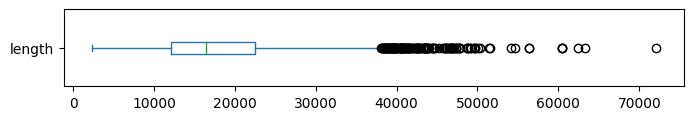

In [9]:
# 박스플롯
# vert=False : 그래프를 수평으로 배치
df['length'].plot(kind='box', vert=False, figsize=(8, 1))

<Axes: ylabel='Frequency'>

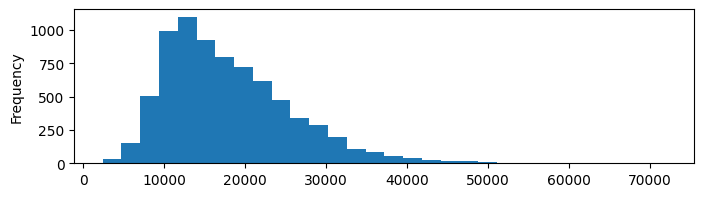

In [10]:
# 히스토그램
df['length'].plot(kind='hist', bins=30, figsize=(8,2))

<Figure size 800x200 with 0 Axes>

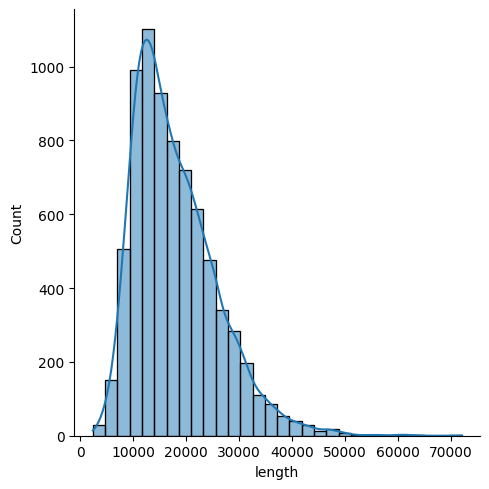

In [11]:
# Not in book: seaborn plot with gaussian kernel density estimate
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(8,2))
sns.displot(df['length'], bins=30, kde=True)
plt.show()

### 범주 간의 값 분포 비교

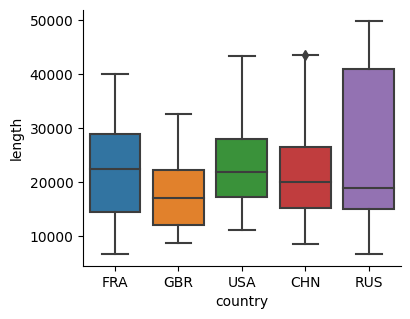

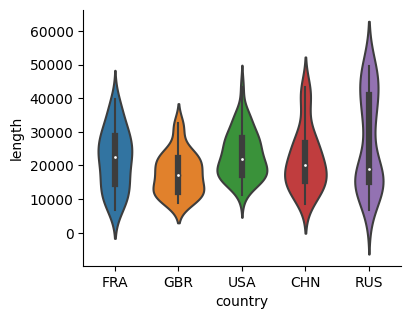

In [12]:
# 각 상임이사국의 연설 길이 분포 시각화
import seaborn as sns

where = df['country'].isin(['USA', 'FRA', 'GBR', 'CHN', 'RUS'])
g = sns.catplot(data = df[where], x='country', y='length', kind='box')
g.fig.set_size_inches(4, 3)
g.fig.set_dpi(100)
g = sns.catplot(data=df[where], x='country', y='length', kind='violin')
g.fig.set_size_inches(4, 3)
g.fig.set_dpi(100)

### 시간 경과에 따른 변화 시각화

<Axes: title={'center': 'Number of Countries'}, xlabel='year'>

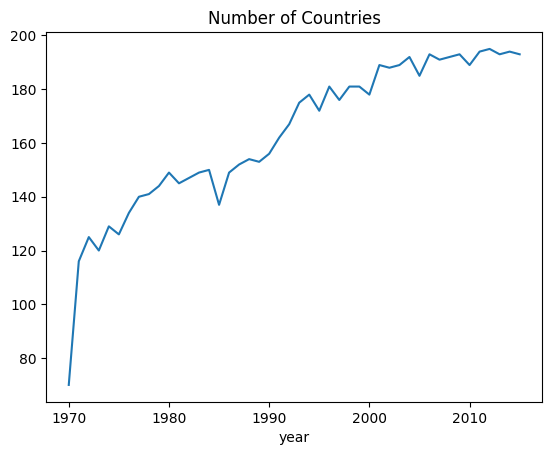

In [13]:
# size() : 그룹화
df.groupby('year').size().plot(title='Number of Countries')

<Axes: title={'center': 'Avg. Speech Length'}, xlabel='year'>

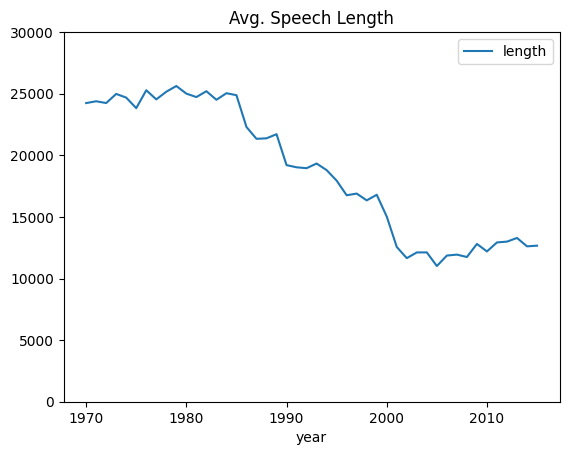

In [14]:
df.groupby('year').agg({'length':'mean'}) \
.plot(title='Avg. Speech Length', ylim=(0,30000))

### 전처리 파이프라인

#### 정규 표현식을 이용한 토큰화
- POSIX문자 클래스 \p{L} : 모든 유니코드 문자를 선택함

In [15]:
# \w에는 숫자, 영문자 및 밑줄 포함(영숫자 문자)
# 하나 이상의 문자와 영숫자 문자, 하이픈(-)으로 구성된 토큰과 일치시킴.
import regex as re

def tokenize(text) : 
    return re.findall(r'[\w-]*\p{L}[\w-]*', text)

In [16]:
# 말뭉치 샘플 문장
text = "Let's defeat SARS-CoV-2 together in 2020!"
tokens = tokenize(text)
print('|'.join(tokens))

Let|s|defeat|SARS-CoV-2|together|in


#### 불용어 처리
- 빠른 조회를 위해 목록을 파이썬의 set()타입으로 변환함

In [17]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LG\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
import nltk

stopwords = set(nltk.corpus.stopwords.words('english'))

In [19]:
# 구현한 함수로 불용어 제거
# nltk목록에는 소문자 단어만 포함되므로 입력 토큰을 소문자로 변환함
def remove_stop(tokens) : 
    return [t for t in tokens if t.lower() not in stopwords]

In [20]:
# 불용어 추가 : |
# 불용어 제거 : -
include_stopwords = {'dear', 'regards', 'must', 'would', 'also'}
exclude_stopwords = {'against'}

stopwords |= include_stopwords
stopwords -= exclude_stopwords

In [21]:
# 파이프라인 구현
# transform : 호출 가능한 함수의 포인터
pipeline = [str.lower, tokenize, remove_stop]

def prepare(text, pipeline) : 
    tokens = text
    for transform in pipeline : 
        tokens = transform(tokens)
    return tokens

In [22]:
# 고차 함수 활용
df['tokens'] = df['text'].apply(prepare, pipeline=pipeline)

In [23]:
# 차후의 요약을 위해 토큰 목록의 길이를 포함한 열 추가
df['num_tokens'] = df['tokens'].map(len)

### 단어 빈도 분석

#### 파이썬 Counter 클래스를 이용한 단어 개수

In [24]:
from collections import Counter

tokens = tokenize('She likes my cats and my cats like my sofa.')

counter = Counter(tokens)
print(counter)

Counter({'my': 3, 'cats': 2, 'She': 1, 'likes': 1, 'and': 1, 'like': 1, 'sofa': 1})


In [25]:
more_tokens = tokenize('She likes dogs and cats.')
counter.update(more_tokens)
print(counter)

Counter({'my': 3, 'cats': 3, 'She': 2, 'likes': 2, 'and': 2, 'like': 1, 'sofa': 1, 'dogs': 1})


In [26]:
# 각각 단일 문서에 대한 Counter 객체의 업데이트 기능을 호출하는 것이 효율적임
counter = Counter()

df['tokens'].map(counter.update)

0       None
1       None
2       None
3       None
4       None
        ... 
7502    None
7503    None
7504    None
7505    None
7506    None
Name: tokens, Length: 7507, dtype: object

In [27]:
# 텍스트에서 가장 빈번하게 나오는 단어를 검색
print(counter.most_common(5))

[('nations', 124508), ('united', 120763), ('international', 117223), ('world', 89421), ('countries', 85734)]


In [28]:
# 판다스 데이터프레임으로 변환
def count_words(df, column = 'tokens', preprocess = None, min_freq = 2) : 

    # 토큰들을 처리하고 counter를 업데이트 한다.
    def update(doc) : 
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(tokens)

    # counter를 생성하고, 모든 데이터에 대해 update를 실행한다.
    counter = Counter()
    df[column].map(update)

    # counter를 데이터프레임으로 변환.
    # @ : 함수에서 사용하는 변수 참조함
    freq_df = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
    freq_df = freq_df.query('freq >= @min_freq')
    freq_df.index.name = 'token'

    return freq_df.sort_values('freq', ascending=False)

In [29]:
freq_df = count_words(df)
freq_df.head()

,freq
token,
nations,124508
united,120763
international,117223
world,89421
countries,85734


In [30]:
# 주어진 텍스트에 대한 토큰화를 바로 진행해 10자 이상의 단어를 바로 찾기
count_words(df, column='text', 
            preprocess=lambda text: re.findall(r'\w{10,}', text))

,freq
token,
international,106974
development,51334
Government,35528
Organization,33763
developing,25177
...,...
enfranchising,2
interrelate,2
compositions,2


### 빈도 다이어그램 생성

[Text(0.5, 0, 'Frequency'), Text(0, 0.5, 'Token'), Text(0.5, 1.0, 'Top Words')]

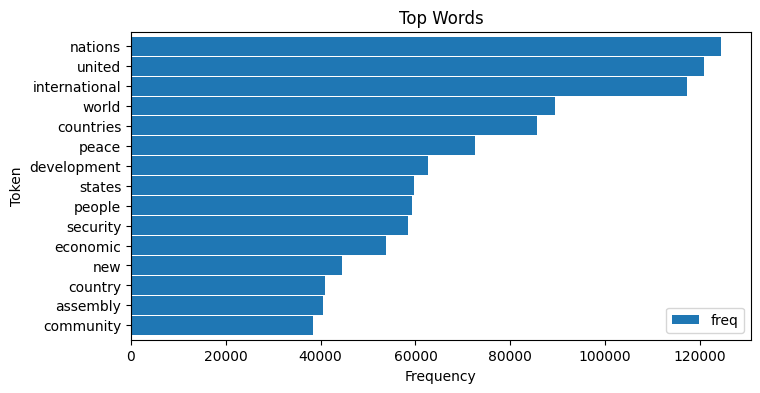

In [31]:
ax = freq_df.head(15).plot(kind='barh', width=0.95, figsize=(8,4))
ax.invert_yaxis()
ax.set(xlabel='Frequency', ylabel='Token', title='Top Words')

### TF-IDF 사용하기

In [32]:
# min_df : 사용 빈도가 낮은 롱테일(발생 수치가 낮은 80%)에 대한 필터 역할
def compute_idf(df, column='tokens', preprocess=None, min_df = 2) : 
    def update(doc) : 
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(set(tokens))

    # 토큰 개수 얻기
    counter = Counter()
    df[column].map(update)

    # 데이터프레임 생성 후 idf 계산하기
    idf_df = pd.DataFrame.from_dict(counter, orient='index', columns=['df'])
    idf_df = idf_df.query('df >= @min_df')
    idf_df['idf'] = np.log(len(df) / idf_df['df']) + 0.1
    idf_df.index.name = 'token'
    return idf_df


In [33]:
idf_df = compute_idf(df)

C:\Users\LG\AppData\Local\Temp\ipykernel_25540\984266548.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  idf_df['idf'] = np.log(len(df) / idf_df['df']) + 0.1


In [34]:
print(idf_df)

                   df       idf
token                          
fratricidal       479  2.851891
powers           2942  1.036746
short            1556  1.673717
reversals          28  5.691387
doomed            283  3.378144
...               ...       ...
tatars              3  7.924979
decarbonization     2  8.330444
fit-for-purpose     2  8.330444
baal                2  8.330444
shamin              2  8.330444

[39373 rows x 2 columns]


In [35]:
# TF-IDF점수 계산하기
freq_df['tfidf'] = freq_df['freq'] * idf_df['df']

In [36]:
freq_df['tfidf']

token
nations          933187460.0
united           904997922.0
international    875186918.0
world            667080660.0
countries        626458338.0
                    ...     
unrewarding              4.0
israel-egypt             4.0
non-jews                 4.0
shouf                    4.0
al-baydhah               NaN
Name: tfidf, Length: 40508, dtype: float64

### 컨텍스트 내 키워드 탐색

In [37]:
# *args : 위치 인자를 튜플 형태로 받음
# **kwargs : 키워드 인자를 딕셔너리 형태로 받음.
import textacy

if textacy.__version__ <'0.11' : 
    from textacy.text.utiles import KWIC
else : # for textacy 0.11.x
    from textacy.extract.kwic import keyword_in_context
    def KWIC(*args, **kwargs) :
        # call keyword_in_context with all params except 'print_only'
        return keyword_in_context(*args, 
                                  **{kw: arg for kw, arg in kwargs.items()
                                     if kw != 'print_only'})

In [38]:
# 데이터프레임의 여러 문서에서 분석이 가능하도록 확장
def kwic(doc_series, keyword, window=35, print_samples = 5) : 
    def add_kwic(text) : 
        kwic_list.extend(KWIC(text, keyword, ignore_case=True,
                              window_width=window, print_only=False))
        
    kwic_list = []
    doc_series.map(add_kwic)

    if print_samples is None or print_samples == 0 : 
        return kwic_list
    else : 
        k = min(print_samples, len(kwic_list))
        print(f'{k} random_samples out of {len(kwic_list)}' + \
              f"context for '{keyword}:")
        for sample in random.sample(list(kwic_list), k) : 
            print(re.sub('[\t\n]', ' ', sample[0]) + ' ' + \
                  sample[1] + ' ' + \
                    re.sub(r'[\n\t]', ' ', sample[2]))

In [39]:
random.seed(22)
kwic(df[df['year'] == 2015]['text'], 'sdgs', print_samples=5)

5 random_samples out of 73context for 'sdgs:
 of our planet and its people. The  SDGs  are a tangible manifestation of th
nd, we are expected to achieve the  SDGs  and to demonstrate dramatic develo
ead by example in implementing the  SDGs  in Bangladesh. Attaching due impor
the Sustainable Development Goals ( SDGs ). We applaud all the Chairs of the
new Sustainable Development Goals ( SDGs ) aspire to that same vision. The A


### N-gram 분석

In [41]:
def ngrams(tokens, n=2, sep=' ') : 
    return [sep.join(ngram) for ngram in zip(*[tokens[i:] for i in range(n)])]

text = 'the visible manifestation of the global climate change'
tokens = tokenize(text)
print('|'.join(ngrams(tokens, 2)))

the visible|visible manifestation|manifestation of|of the|the global|global climate|climate change


In [43]:
# 모든 토큰에 대한 바이그램을 생성한 뒤 
# 불용어를 포함하지 않는 토큰만 유지
def ngrams(tokens, n=2, sep=' ', stopwords=set()) : 
    return [sep.join(ngram) for ngram in zip(*[tokens[i:] for i in range(n)]) 
            if len([t for t in ngram if t in stopwords]) == 0]

print('Bigrams: ', '|'.join(ngrams(tokens, 2, stopwords=stopwords)))
print('Trigrams: ', '|'.join(ngrams(tokens, 3, stopwords=stopwords)))

Bigrams:  visible manifestation|global climate|climate change
Trigrams:  global climate change


In [49]:
# ngram함수는 모든 바이그램을 포함한 열을 데이터프레임에 추가
# 앞서 단어 계수에 사용한 count_words를 적용해 상위 5개 바이그램을 결정함.
df['bigrams'] = df['text'].apply(prepare, pipeline=[str.lower, tokenize]) \
.apply(ngrams, n=2, stopwords=stopwords)

count_words(df, 'bigrams').head()

,freq
token,
united nations,103236
international community,27786
general assembly,27096
security council,20961
human rights,19856


In [54]:
idf_df = compute_idf(df) ### re-initialize to be safe
# concatenate existing IDF data frame with bigram IDFs
idf_df = pd.concat([idf_df, compute_idf(df, 'bigrams', min_df=10)])

freq_df = count_words(df[df['year'] == 2015], 'bigrams')
freq_df['tfidf'] = freq_df['freq'] * idf_df['idf']

C:\Users\LG\AppData\Local\Temp\ipykernel_25540\984266548.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  idf_df['idf'] = np.log(len(df) / idf_df['df']) + 0.1
C:\Users\LG\AppData\Local\Temp\ipykernel_25540\984266548.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  idf_df['idf'] = np.log(len(df) / idf_df['df']) + 0.1


### 시간 및 범주에 따른 빈도 비교

#### 1. 빈도 타임라인 생성

In [60]:
# get(k,0) : 해당 키가 counter에 없는 경우 기본값으로 0 반환
def count_keywords(tokens, keywords) : 
    tokens = [t for t in tokens if t in keywords]
    counter = Counter(tokens)
    return [counter.get(k, 0) for k in keywords]

In [61]:
keywords = ['nuclear', 'terrorism', 'climate', 'freedom']
tokens = ['nuclear', 'climate', 'climate', 'freedom', 'climate', 'freedom']

print(count_keywords(tokens, keywords))

[1, 0, 3, 2]


In [68]:
#  함수를 데이터프레임으 각 문서에 적용하기
def count_keywords_by(df, by, keywords, column='tokens') : 
    freq_matrix = df[column].apply(count_keywords, keywords=keywords)
    freq_df = pd.DataFrame.from_records(freq_matrix, columns=keywords)
    freq_df[by] = df[by] # copy the grouping column(s)

    return freq_df.groupby(by=by).sum().sort_values(by)

In [69]:
freq_df = count_keywords_by(df, by='year', keywords=keywords)

In [76]:
pd.options.display.max_rows = 4
pd.options.display.max_rows = 60
freq_df.head(10)

,nuclear,terrorism,climate,freedom
year,,,,
1970,192,7,18,128
1971,275,9,35,205
1972,393,379,74,280
1973,347,124,79,266
1974,478,24,71,316
1975,578,20,53,232
1976,451,146,57,347
1977,675,75,58,321
1978,550,82,52,309


<Axes: xlabel='year'>

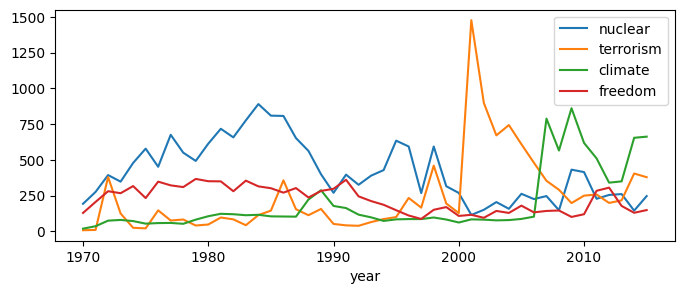

In [77]:
# 시각화
freq_df.plot(kind='line', figsize=(8, 3))

### 2. 빈도 히트맵 생성